In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

In [7]:
# 1. Análisis Exploratorio de los Datos
# Cargar datos
data = pd.read_csv(r'C:\Users\david\OneDrive\Escritorio\Titanic-Dataset.csv') 

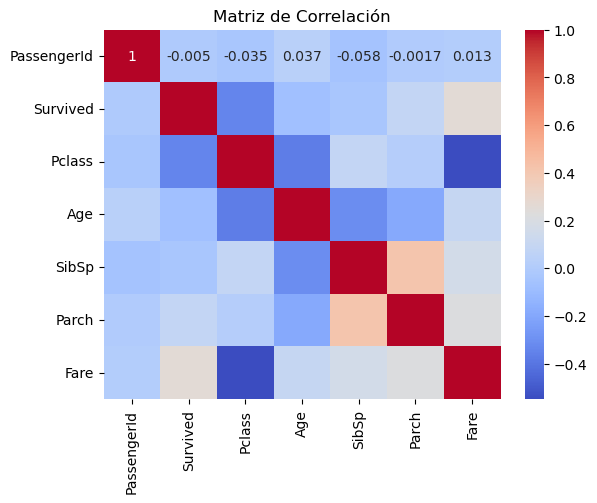

In [9]:
# Visualización de la matriz de correlación solo con variables numéricas
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

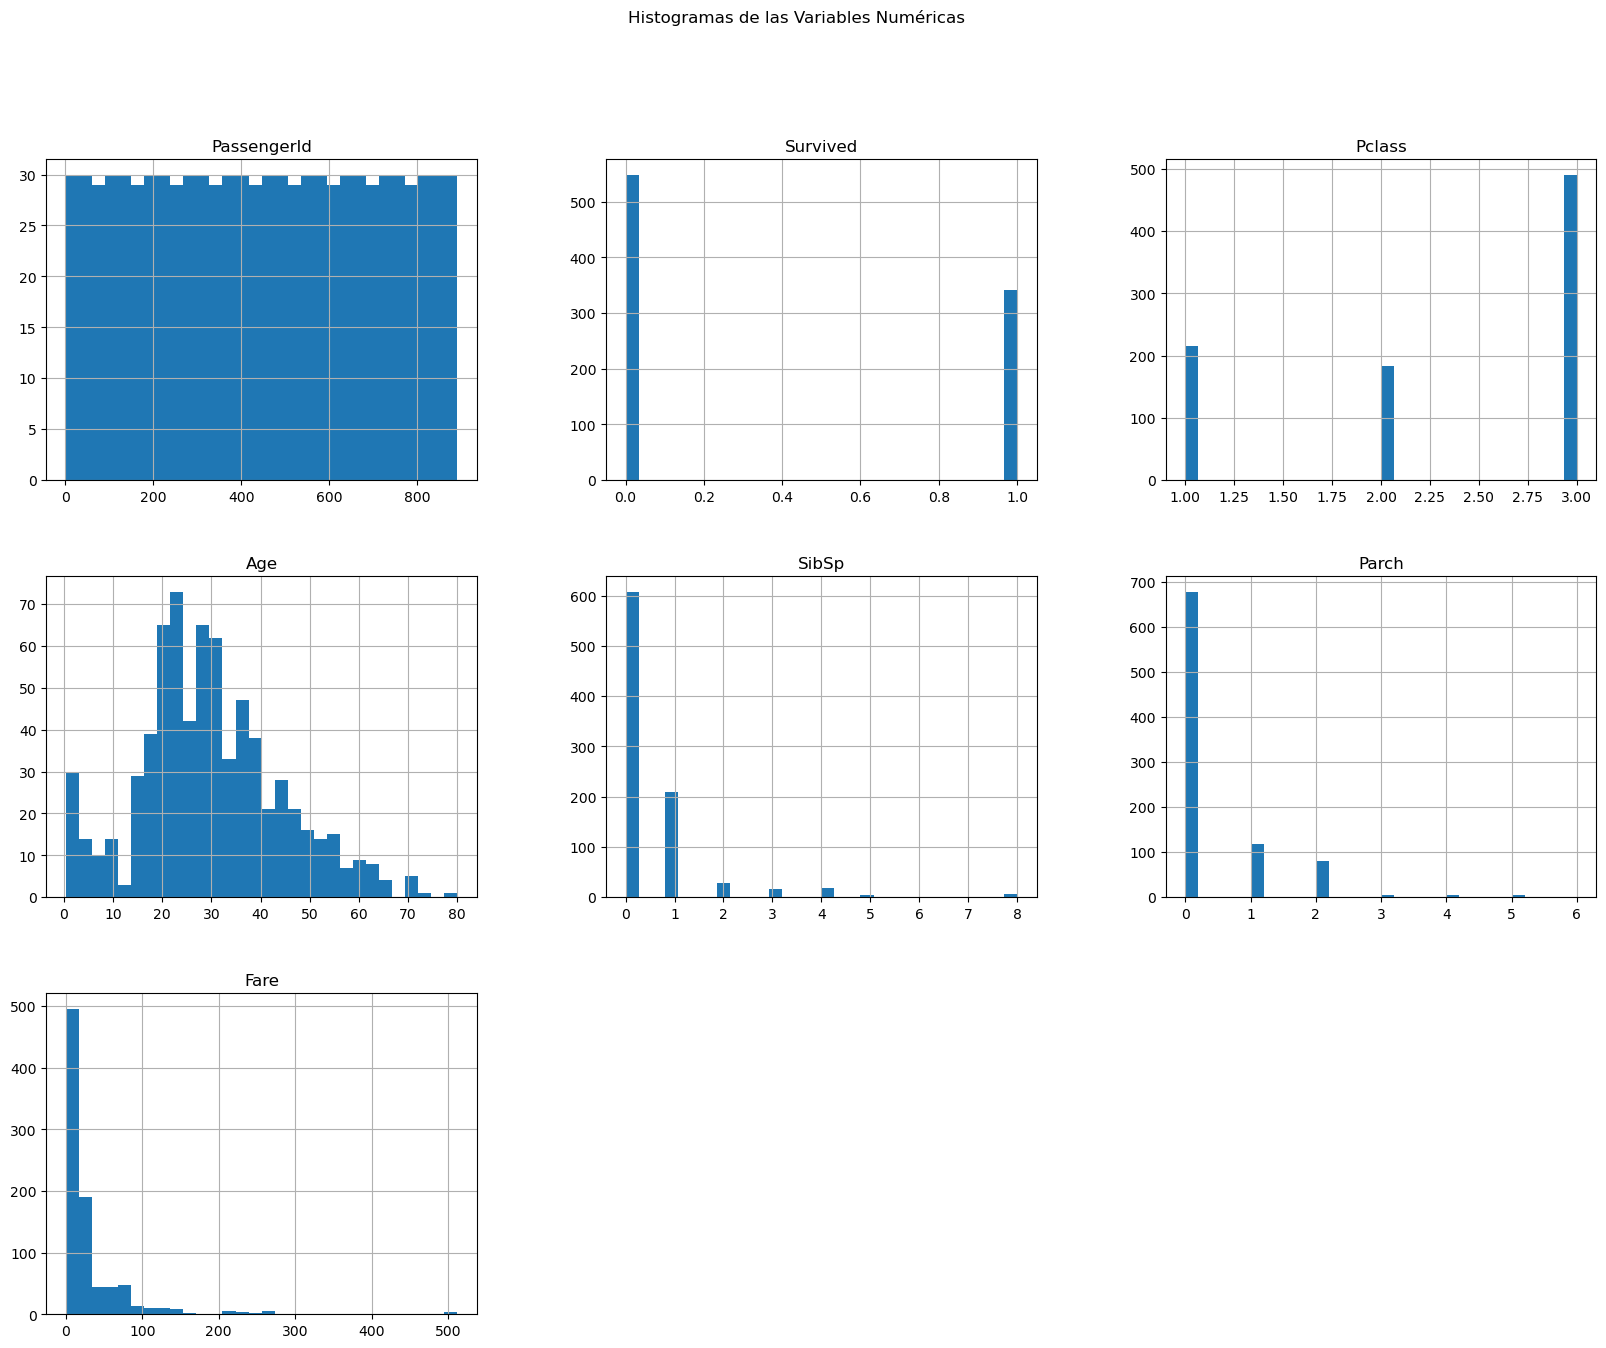

In [10]:
# Visualización de histogramas de cada característica numérica
numeric_data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histogramas de las Variables Numéricas')
plt.show()

In [13]:
# 2. Preprocesamiento de Datos
# Separar las columnas numéricas y categóricas
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [14]:
# Imputar las columnas numéricas con la media
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

In [15]:
# Imputar las columnas categóricas con la moda
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

In [16]:
# Verificar si hay valores faltantes después de la imputación
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [18]:
# Codificación de variables categóricas
data = pd.get_dummies(data, drop_first=True)

In [19]:
# Separar características y objetivo (asegúrate de que 'Survived' sea el nombre correcto de la columna objetivo)
X = data.drop('Survived', axis=1)
y = data['Survived']

In [20]:
# Estandarización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# 3. Selección de Características
# Selección con SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

In [22]:
# 4. División del Dataset
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)


In [23]:
# 5. Entrenamiento del Modelo
# Ajuste de hiperparámetros
param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100]})

In [24]:
# Mejor modelo
best_model = grid.best_estimator_

In [25]:
# 6. Evaluación del Modelo
y_pred = best_model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [27]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.7873134328358209
Precision: 0.7410714285714286
Recall: 0.7477477477477478
F1-score: 0.7443946188340808


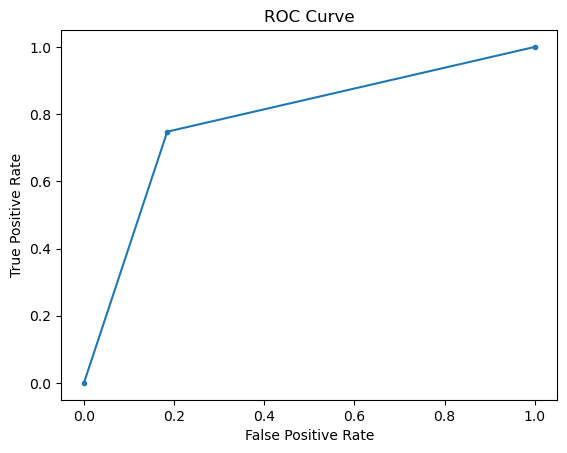

In [28]:
# 7. Visualización de Resultados
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

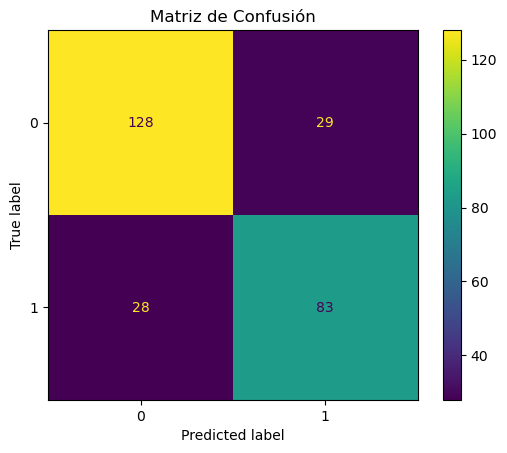

In [29]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusión')
plt.show()